# Reverse Engineering the planningverzoeken API




## To do:
[] plantuml png handmatig => automatisch <br>

## Contents:
1. Basic info of the API and inspection
2. Getting the paths and endpoints
3. Getting the objects with attributes
4. Writing it to json, plantuml and .csv

## 1. Basic info of the API and inspection

In [1]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\VERA'

In [2]:
import glob
my_jsons=glob.glob('*.json')
my_yamls = glob.glob('*.yaml')
my_jsons, my_yamls

(['planningsverzoeken-api.json',
  'planningsverzoeken-api_data.json',
  'Saxton API_data.json',
  'saxton.json'],
 ['saxton.yaml'])

In [3]:
#loading the API into active dictionary
import json

with open('planningsverzoeken-api.json') as f:
    spec = json.load(f)

In [4]:
list(spec)

['swagger',
 'info',
 'host',
 'tags',
 'schemes',
 'paths',
 'definitions',
 'security',
 'securityDefinitions',
 'basePath']

In [100]:
spec['schemes']

['https']

In [5]:
#version is too long and missing a 'v'
API_version =spec['info']['version']
API_version = "v"+API_version[:5]
API_version

'v1.0.5'

In [6]:
OAS_version =spec['swagger']
API_name = spec['info']['title']
print(OAS_version, API_name)

2.0 planningsverzoeken-api


## 2. Getting the paths and endpoints

In [7]:
paths =list(spec['paths'])
print(len(paths))
paths

3


['/v1/onderhoud/planningsverzoeken/tijdslotvoorstellen',
 '/v1/onderhoud/planningsverzoeken/tijdslot',
 '/v1/onderhoud/planningsverzoeken/tijdslot/{bedrijfid}/{identificatie}']

In [8]:
endpoints_dict = {}
for i in range (len(paths)):
    endpoints_dict[paths[i]]=list(spec['paths'][paths[i]])
endpoints_dict 

{'/v1/onderhoud/planningsverzoeken/tijdslotvoorstellen': ['post'],
 '/v1/onderhoud/planningsverzoeken/tijdslot': ['post'],
 '/v1/onderhoud/planningsverzoeken/tijdslot/{bedrijfid}/{identificatie}': ['put',
  'delete']}

## 3. Getting the objects

In [9]:
#inspection of the objects
spec['definitions']

{'Eenheid': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'}}},
 'BeschikbareTijdslotsRequest': {'type': 'object',
  'properties': {'actiecode': {'type': 'string'},
   'bedrijf': {'$ref': '#/definitions/FinancieelBedrijf'},
   'begindatum': {'type': 'string', 'format': 'date'},
   'eenheid': {'$ref': '#/definitions/Eenheid'},
   'einddatum': {'type': 'string', 'format': 'date'}}},
 'FinancieelBedrijf': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'}}},
 'Sturingslabel': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'},
   'datum': {'type': 'string', 'format': 'date-time'},
   'label': {'type': 'string'},
   'soort': {'type': 'string'},
   'bron': {'type': 'string'}}},
 'Tijdslot': {'type': 'object',
  'properties': {'index': {'type': 'integer', 'format': 'int32'},
   'begindatum': {'type': 'string', 'format': 'date-time'},
   'einddatum': {'type': 'string', 'format': 'date-time'},
   'medewerker': {'$ref': '#/definit

In [10]:
objects = list(spec['definitions'])
print(len(objects))
objects

12


['Eenheid',
 'BeschikbareTijdslotsRequest',
 'FinancieelBedrijf',
 'Sturingslabel',
 'Tijdslot',
 'Contactgegeven',
 'TijdslotsResponse',
 'NatuurlijkPersoon',
 'BoekTijdslotRequest',
 'Onderhoudstaak',
 'ErrorResponse',
 'UpdateTijdslotRequest']

In [11]:
#inspection of an object
spec['definitions']['Eenheid']

{'type': 'object', 'properties': {'identificatie': {'type': 'string'}}}

In [15]:
#creating a dictionary with objects and their properties
object_dict ={}
objects = list(spec['definitions'])
for i in range (len(objects)):
    try:
        object_dict[objects[i]]=list(spec['definitions'][objects[i]]['properties'])#['properties']
    except:
        pass
object_dict 

{'Eenheid': ['identificatie'],
 'BeschikbareTijdslotsRequest': ['actiecode',
  'bedrijf',
  'begindatum',
  'eenheid',
  'einddatum'],
 'FinancieelBedrijf': ['identificatie'],
 'Sturingslabel': ['identificatie', 'datum', 'label', 'soort', 'bron'],
 'Tijdslot': ['index',
  'begindatum',
  'einddatum',
  'medewerker',
  'reisafstand',
  'reistijd',
  'routeid',
  'volgnummer'],
 'Contactgegeven': ['soort',
  'detailSoort',
  'waarde',
  'voorkeur',
  'landnummer',
  'netnummer',
  'abonneenummer',
  'extensie',
  'dagdelen'],
 'TijdslotsResponse': ['identificatie', 'tijdslots'],
 'NatuurlijkPersoon': ['identificatie',
  'soort',
  'voornaam',
  'initialen',
  'tussenvoegsels',
  'achternaam',
  'roepnaam',
  'aanhef',
  'voorletters',
  'contactgegevens',
  'sturingslabels'],
 'BoekTijdslotRequest': ['tijdslot', 'bedrijf', 'onderhoudstaak'],
 'Onderhoudstaak': ['identificatie'],
 'ErrorResponse': ['timestamp', 'status', 'error', 'message'],
 'UpdateTijdslotRequest': ['tijdslot']}

In [16]:
#converting the python dict to a JSON 
import json 
      
# Serializing json  
json_object = json.dumps(object_dict, indent = 4) 
print(json_object)

{
    "Eenheid": [
        "identificatie"
    ],
    "BeschikbareTijdslotsRequest": [
        "actiecode",
        "bedrijf",
        "begindatum",
        "eenheid",
        "einddatum"
    ],
    "FinancieelBedrijf": [
        "identificatie"
    ],
    "Sturingslabel": [
        "identificatie",
        "datum",
        "label",
        "soort",
        "bron"
    ],
    "Tijdslot": [
        "index",
        "begindatum",
        "einddatum",
        "medewerker",
        "reisafstand",
        "reistijd",
        "routeid",
        "volgnummer"
    ],
    "Contactgegeven": [
        "soort",
        "detailSoort",
        "waarde",
        "voorkeur",
        "landnummer",
        "netnummer",
        "abonneenummer",
        "extensie",
        "dagdelen"
    ],
    "TijdslotsResponse": [
        "identificatie",
        "tijdslots"
    ],
    "NatuurlijkPersoon": [
        "identificatie",
        "soort",
        "voornaam",
        "initialen",
        "tussenvoegsels",
     

## 4. Writing it to a .json, plantuml and .csv file

In [17]:
#writing it to a json
import json
with open(API_name+'_data.json', 'w', encoding='utf-8') as f:
    json.dump(json_object, f, ensure_ascii=False, indent=4)

In [18]:
import glob
my_jsons = glob.glob('*.json')
my_jsons

['planningsverzoeken-api.json',
 'planningsverzoeken-api_data.json',
 'vastgoed_data.json']

In [19]:
textfile = open("plantuml_"+API_name+"_data.txt", "w")
textfile.write('@startuml\n')
for key, value in object_dict.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
textfile.write('@enduml')
textfile.close() 

In [20]:
import glob
my_txts = glob.glob('*.txt')
my_txts

['accounts.txt',
 'plantuml_planningsverzoeken-api_data.txt',
 'plantuml_planningsverzoeken.txt',
 'plantuml_vastgoed.txt']

In [21]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\VERA\plantuml_planningsverzoeken.txt

In [22]:
#convert the txt file to an .png image using plantuml
!python -m plantuml plantuml_planningsverzoeken-api_data.txt

[{'filename': 'plantuml_planningsverzoeken-api_data.txt', 'gen_success': True}]


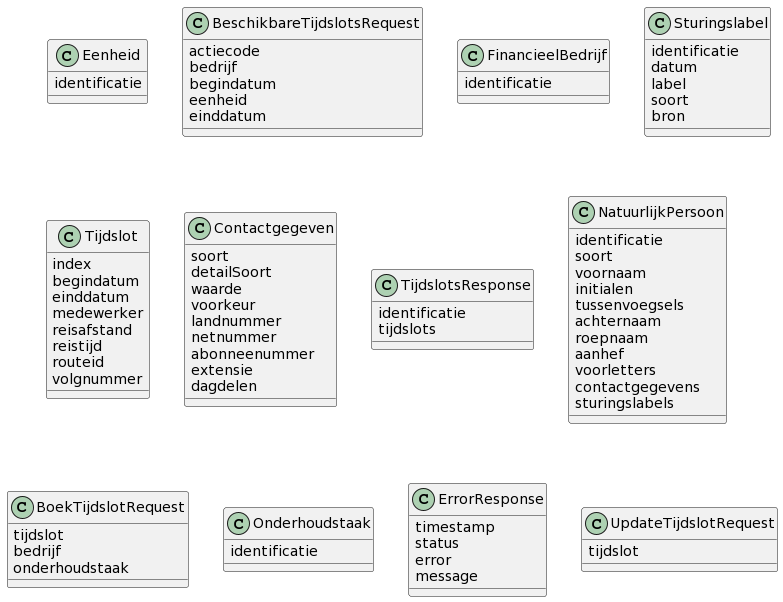

In [23]:
#show the generated png
from IPython import display
display.Image(filename="plantuml_planningsverzoeken-api_data.png", width=1200, height=500)

## Write it to a .csv file

 a .csv file with a ; seperator between key and values

In [96]:
with open(API_name+"_data.csv", mode="w") as pv:
    for key, value in object_dict.items():
        pv.write(str(key)+";")
        for i in range (len(value)-1):
            pv.write(value[i]+",")#write values + a comma  
        pv.write(value[-1]+"\n") #write last value (and no comma) 

In [97]:
import glob
my_csvs=glob.glob('*.csv')
my_csvs

['planningsverzoeken-api_data.csv']

In [102]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\VERA\\planningsverzoeken-api_data.csv